# Anmol Kale

# The Sparks Foundation

## Task 1 - Prediction using Decision Tree Algorithm on iris dataset (Level - Intermediate)

### What is the need?

The Irises are perennial plants, and there are three species setosa, versicolor, and virginica look almost identical. It is very difficult to classify them, some keeping in mind some of its physical appearances can be used to tell the species. This project involves the machine learning concept, and it collects data about the parameters such as petals size. Machine learning can be used to predict the output by studying the pattern of data.

This data set  includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

    Id
    SepalLengthCm
    SepalWidthCm
    PetalLengthCm
    PetalWidthCm
    Species

### Importing Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [84]:
data = pd.read_csv('Iris.csv')

In [85]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Renaming Columns

In [86]:
data = data.rename({"SepalLengthCm":"Sepal_Length",
                    "SepalWidthCm":"Sepal_Width",
                   "PetalLengthCm":"Petal_Length",
                   "PetalWidthCm":"Petal_Width"}, axis='columns')

In [87]:
data

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Summary

In [88]:
data.shape  # Checking Shape

(150, 6)

In [89]:
data['Species'].value_counts() # Value Counts

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_Length  150 non-null    float64
 4   Petal_Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [91]:
data.isnull().sum() # Checking Null values

Id              0
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [92]:
data.describe()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Visualization

### Scatter Plot between Petal lenght and Petal Width

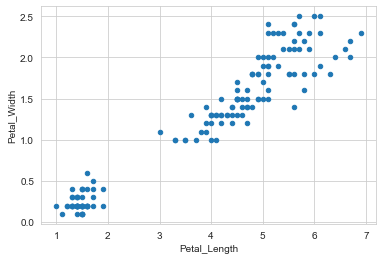

In [93]:
data.plot(kind='scatter', x='Petal_Length', y='Petal_Width') 
plt.show()

### Scatter Plot of all the columns with hue as Species

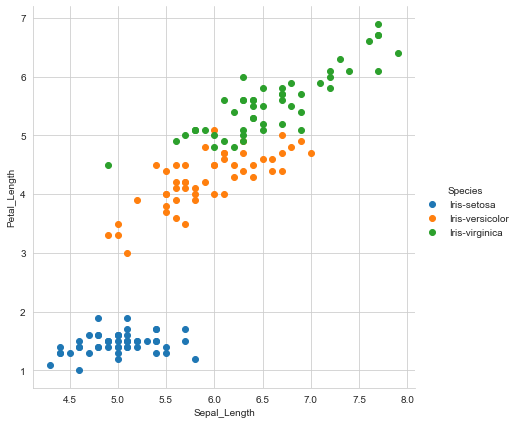

In [94]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="Species",height = 6).map(plt.scatter,'Sepal_Length','Petal_Length').add_legend()
plt.show()

### Pie Chart of Target Column [Species]

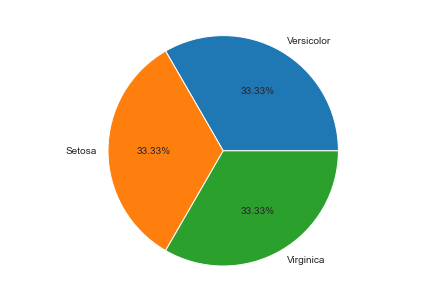

In [95]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

### Boxplot

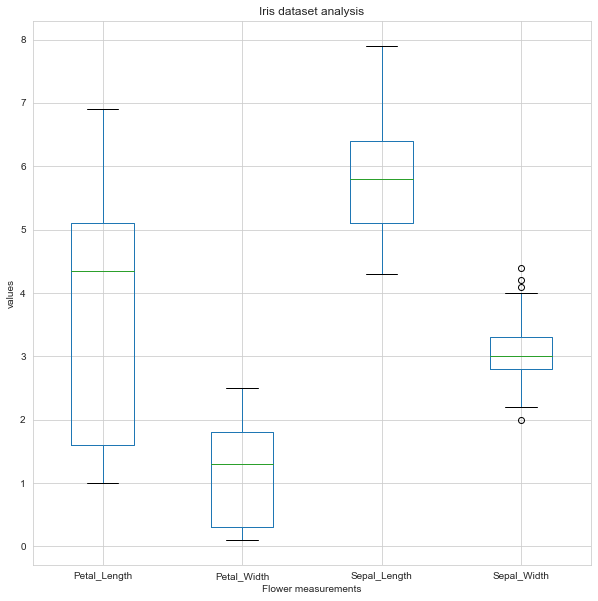

In [96]:
plt.figure(figsize = (10,10))
length_width = data[['Petal_Length','Petal_Width','Sepal_Length','Sepal_Width']] #excluding species column
length_width.boxplot()
plt.xlabel('Flower measurements')
plt.ylabel('values')
plt.title("Iris dataset analysis")
plt.show()

### Violin Plot

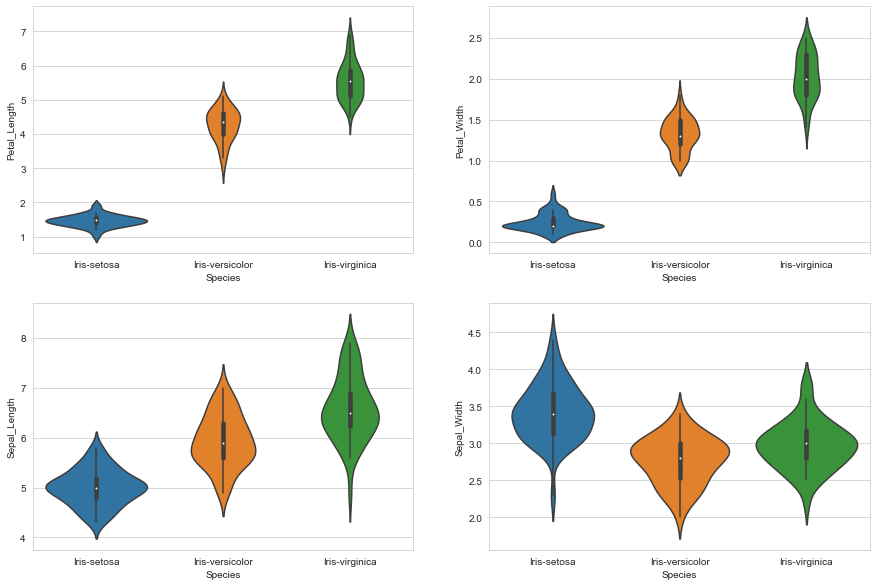

In [97]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='Petal_Length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='Petal_Width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='Sepal_Length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='Sepal_Width',data=data)
plt.show()


### Heat Map

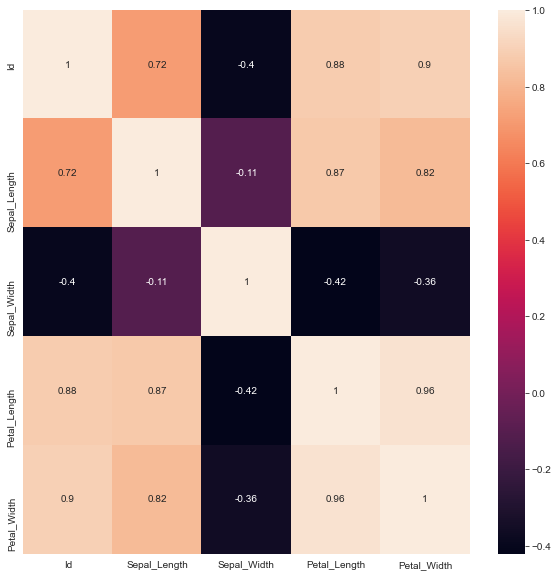

In [98]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Pair Plot

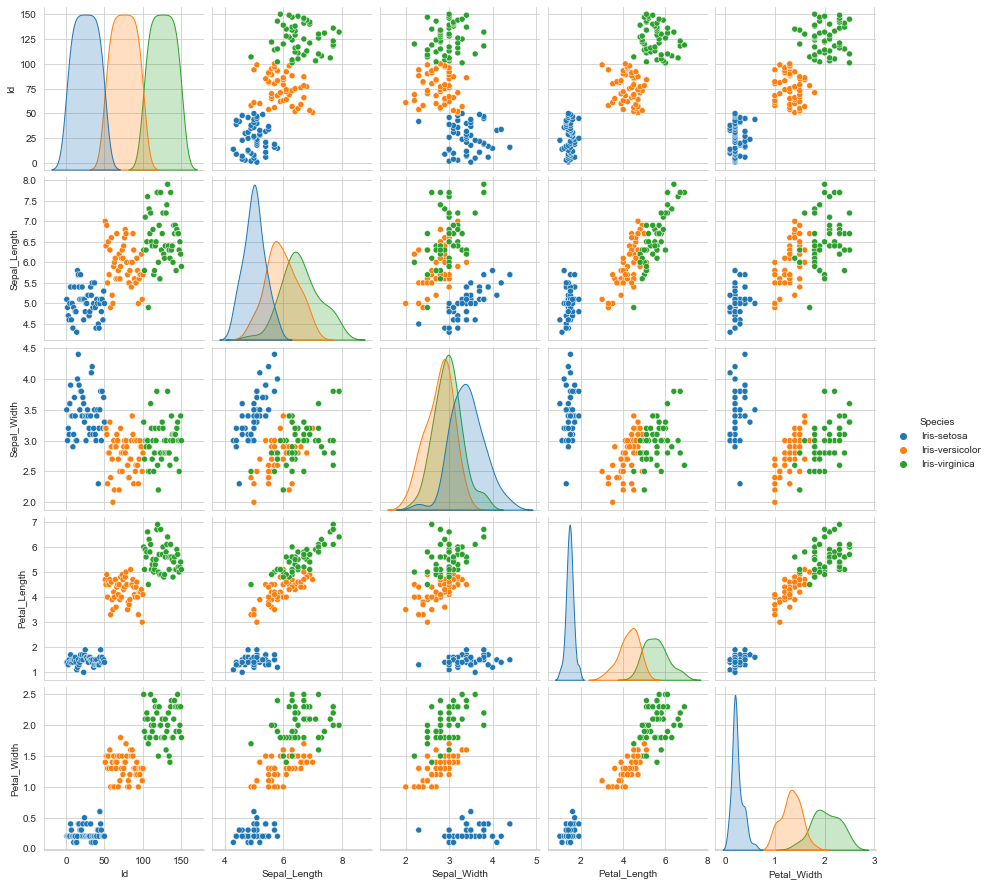

In [99]:
sns.pairplot(data, hue="Species");
plt.show()

### 3D Plot Using Plotly

In [100]:
import plotly.express as px
fig = px.scatter_3d(data, x='Sepal_Length', y='Sepal_Width', z='Petal_Width',
                    color='Petal_Length', symbol='Species')
fig.show()

### Defining X and Y variables

In [101]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Train Test Split

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


### Standard Scaling of Data

In [103]:
from sklearn.preprocessing import StandardScaler

std_slc = StandardScaler()
std_slc.fit(X_train)
X_train_std = std_slc.transform(X_train)
X_test_std = std_slc.transform(X_test)

print(X_train[0:5])
print(X_train_std[0:5])
print(X_test[0:5])
print(X_test_std[0:5])

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
76            6.8          2.8           4.8          1.4
96            5.7          2.9           4.2          1.3
119           6.0          2.2           5.0          1.5
101           5.8          2.7           5.1          1.9
25            5.0          3.0           1.6          0.2
[[ 1.15648738 -0.54035544  0.59307474  0.26928484]
 [-0.17327163 -0.31829156  0.24870876  0.13684967]
 [ 0.18938992 -1.87273871  0.70786339  0.40172   ]
 [-0.05238445 -0.76241932  0.76525772  0.93146067]
 [-1.01948191 -0.09622768 -1.2435438  -1.31993715]]
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
43            5.0          3.5           1.6          0.6
129           7.2          3.0           5.8          1.6
3             4.6          3.1           1.5          0.2
34            4.9          3.1           1.5          0.1
[[-0.89859472  1.01409172 -1.35833246 -1.3199371

## Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_std, y_train)

DecisionTreeClassifier()

### Visualizing the Tree

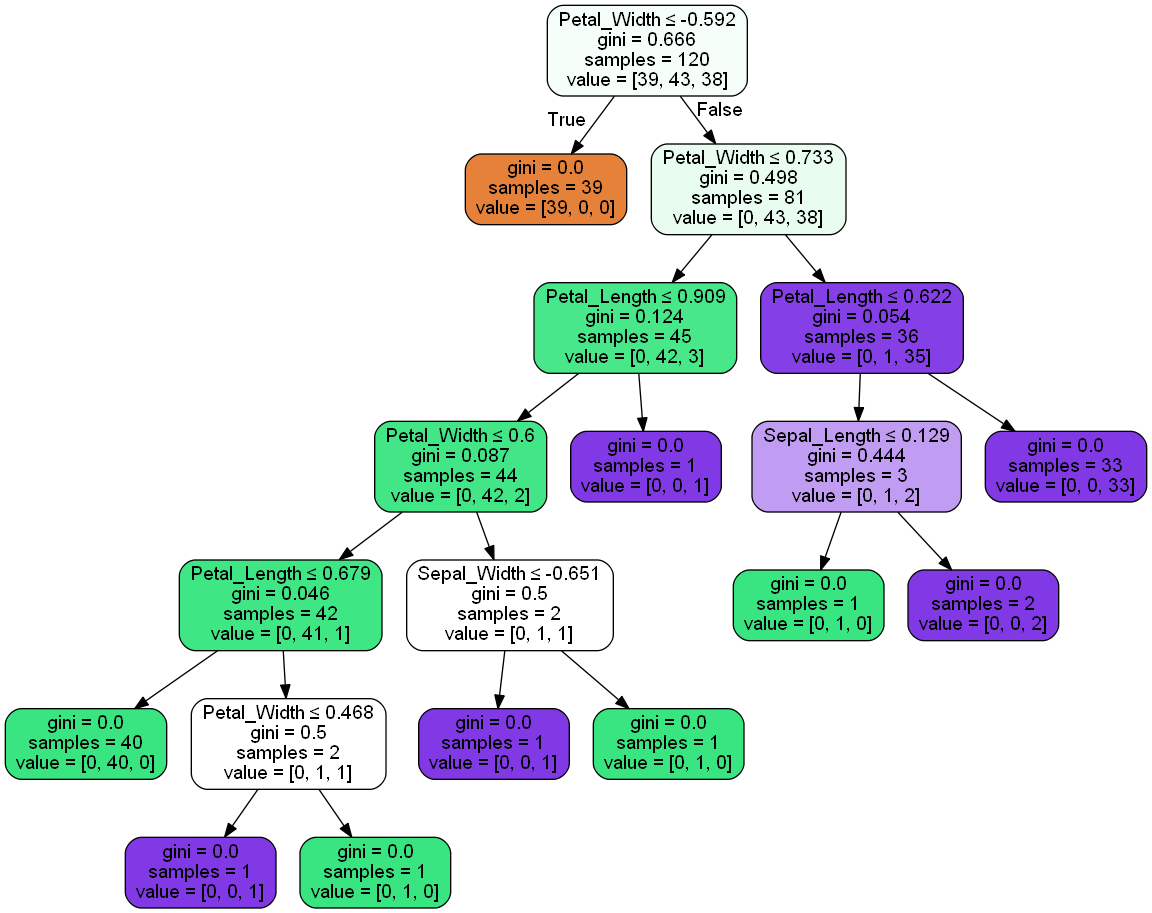

In [105]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
features = X.columns
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### Evaluation Metrics

In [106]:
from sklearn.metrics import *


y_train_pred = dtc.predict(X_train_std)
print('Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

print('\n')
y_test_pred = dtc.predict(X_test_std)
print('Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

Accuracy - Train:  1.0


Accuracy - Test:  1.0


Seems like our Model Overfitted the so will tune the Model using RandomizedSearch CV

### Hyperparameter Tuning using RandomizedSearch CV

In [107]:
import sklearn
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])


In [108]:
dtc = DecisionTreeClassifier(random_state=4)
from scipy.stats import randint as sp_randint

params = {'max_depth': sp_randint(1, 10),
          'min_samples_leaf': sp_randint(1, 20),
          'min_samples_split': sp_randint(2, 20),
          'criterion': ['gini', 'entropy']}

rsearch = RandomizedSearchCV(dtc, param_distributions=params, n_iter=500, scoring='accuracy', cv=3, random_state=4,
                             return_train_score=True)
rsearch.fit(X, y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=4),
                   n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000174D0CDE2E0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000174D0D06670>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000174CC27A700>},
                   random_state=4, return_train_score=True, scoring='accuracy')

### The Best Parameters

In [109]:
rsearch.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

### Training Again Using Best parameters

In [112]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
dtc = DecisionTreeClassifier(**rsearch.best_params_, random_state=4)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_split=10, random_state=4)

### Accuracy 

In [113]:
y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,1]
print('Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

y_test_pred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,1]
print('Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

Accuracy - Train:  0.975
Accuracy - Test:  0.9666666666666667
